## Work

```
save_best_only: if save_best_only=True, the latest best model according to the quantity monitored will not be overwritten.
```

1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

# 預防錯誤： OMP: Error #15: Initializing libiomp5.dylib, but found libiomp5.dylib already initialized.
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

# 三層隱藏層，一個輸出層(softmax)
def build_mlp(input_shape, output_units=10, drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    x = keras.layers.Dense(units=256, activation="relu", name="hidden_layer_0")(input_layer)
    x = BatchNormalization()(x)
    x = keras.layers.Dense(units=128, activation="relu", name="hidden_layer_1")(x)
    x = BatchNormalization()(x)
    x = keras.layers.Dense(units=64, activation="relu", name="hidden_layer_2")(x)
    x = BatchNormalization()(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
"""Code Here
設定超參數
"""

LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
from keras.callbacks import ModelCheckpoint

def run_model(results: dict, save_best_only: bool):
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model_ckpt = ModelCheckpoint(filepath="./tmp-{}.h5".format(str(save_best_only)), 
                             monitor="val_loss", 
                             save_best_only=save_best_only)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[model_ckpt]
             )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "save_best_only-{}".format(str(save_best_only))

    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}   

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for save_best_only in [True, False]:
    run_model(results, save_best_only)

W0725 22:07:00.838485 4643157440 deprecation_wrapper.py:119] From /Users/ken/virtualenv/default/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 22:07:00.919224 4643157440 deprecation_wrapper.py:119] From /Users/ken/virtualenv/default/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 22:07:00.959028 4643157440 deprecation_wrapper.py:119] From /Users/ken/virtualenv/default/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0725 22:07:01.113684 4643157440 deprecation_wrapper.py:119] From /Users/ken/virtualenv/default/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.p

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer_0 (Dense)       (None, 256)               786688    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 64)                8256      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
__________

Epoch 50/50
50000/50000 [==============================] - 5s 100us/step - loss: 0.8599 - acc: 0.7102 - val_loss: 1.5293 - val_acc: 0.4973
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer_0 (Dense)       (None, 256)               786688    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 128)               32896     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 64)                8256      
___

Epoch 49/50
50000/50000 [==============================] - 5s 91us/step - loss: 0.8931 - acc: 0.6968 - val_loss: 1.5301 - val_acc: 0.4889
Epoch 50/50
50000/50000 [==============================] - 4s 90us/step - loss: 0.8800 - acc: 0.7005 - val_loss: 1.5370 - val_acc: 0.4832


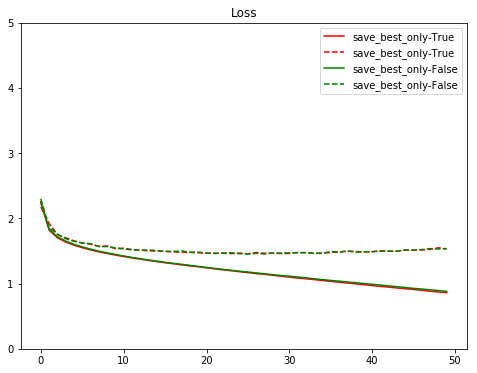

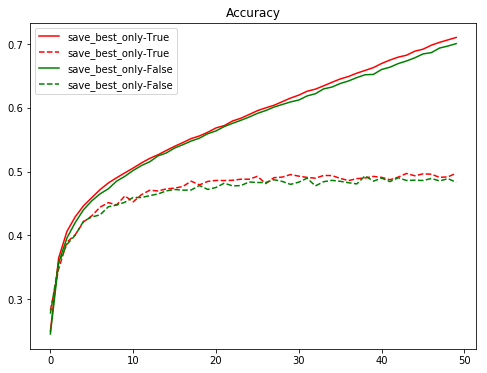

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [10]:
# Load back
model = keras.models.load_model("./tmp-True.h5")
loss_loadback, acc_loadback = model.evaluate(x_test, y_test) 

print(loss_loadback, acc_loadback)

10000/10000 [==============================] - 1s 130us/step
1.455627875328064 0.4925


### Answer

從上圖中save_best_only=True 或 False的比較來看
兩者的結果很接近
但Accuracy的部份，不論訓練集或驗證集
save_best_only=True時的效果比False時略微好一些 